## Preprocessing

In [162]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [163]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [164]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [165]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [166]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_counts[application_counts < 500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [167]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [168]:
# You may find it helpful to look at CLASSIFICATION value counts >1
print(classification_counts[classification_counts > 1])

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [169]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts < 1000].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [170]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [171]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [172]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [173]:
#Set up a seed so it gives the same performance everytime the code is run 
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## Compile, Train and Evaluate the Model with OPTIMIZATION

In [174]:
#FIRST ATTEMPT Changing the Activation with Tanh at first attempt
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, input_dim=X_train_scaled.shape[1], activation='tanh'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

c:\Users\Javier Alarcon\anaconda3\envs\dev\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                │ (None, 5)              │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [175]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [176]:
# Train the model
try1 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.5753 - loss: 0.6645
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.7190 - loss: 0.5733
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.7256 - loss: 0.5622
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.7264 - loss: 0.5587
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.7261 - loss: 0.5568
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7265 - loss: 0.5555
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7270 - loss: 0.5545
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7292 - loss: 0.5536
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.7328 - loss: 0.5529
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7328 - loss: 0.5524
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7333 - loss: 0.5518
Epoch 12/100
804/80

In [177]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 668us/step - accuracy: 0.7287 - loss: 0.5547
Loss: 0.5547013282775879, Accuracy: 0.7287463545799255


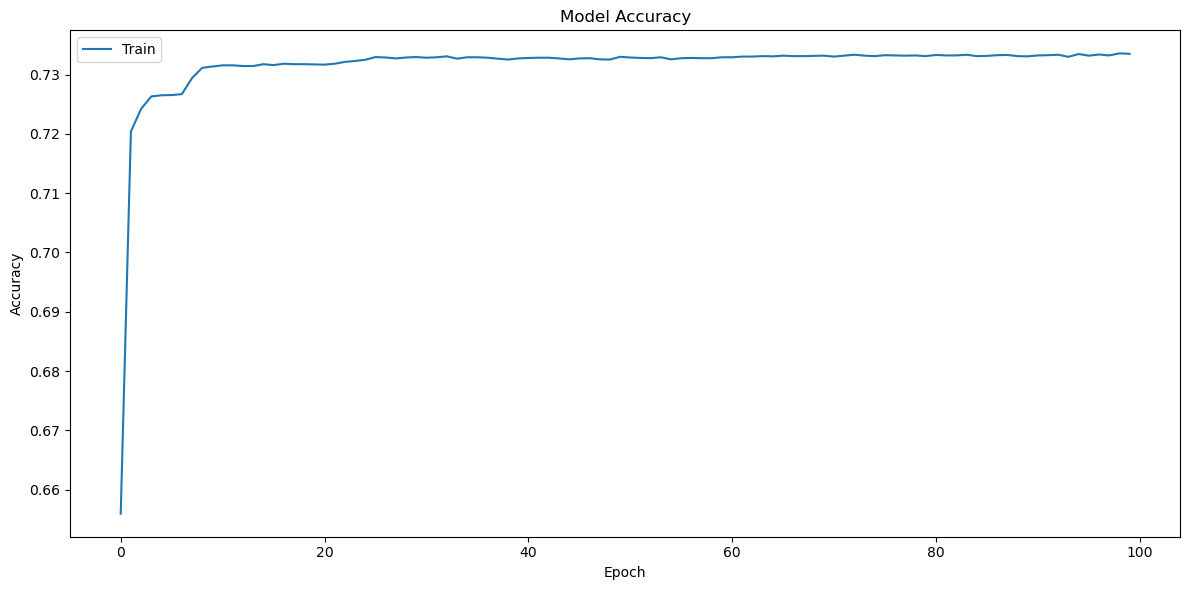

In [178]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.plot(try1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig(f'img/training_accuracy_1.png')
plt.show()

In [179]:
#Second ATTEMPT Added Another Layer to the sistem all Relu activation

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=100, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=70, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 100)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 70)             │         7,070 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 10)             │           710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,191 (47.62 KB)

 Trainable params: 12,191 (47.62 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [181]:
# Train the model
try2 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.7084 - loss: 0.5869
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7282 - loss: 0.5578
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.7287 - loss: 0.5538
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.7303 - loss: 0.5513
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7320 - loss: 0.5501
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.7321 - loss: 0.5490
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.7327 - loss: 0.5480
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7336 - loss: 0.5470
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.7342 - loss: 0.5461
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.7348 - loss: 0.5458
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.7350 - loss: 0.5452
Epoch 12/100
804/80

In [182]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 739us/step - accuracy: 0.7271 - loss: 0.5605
Loss: 0.5604926943778992, Accuracy: 0.7271137237548828


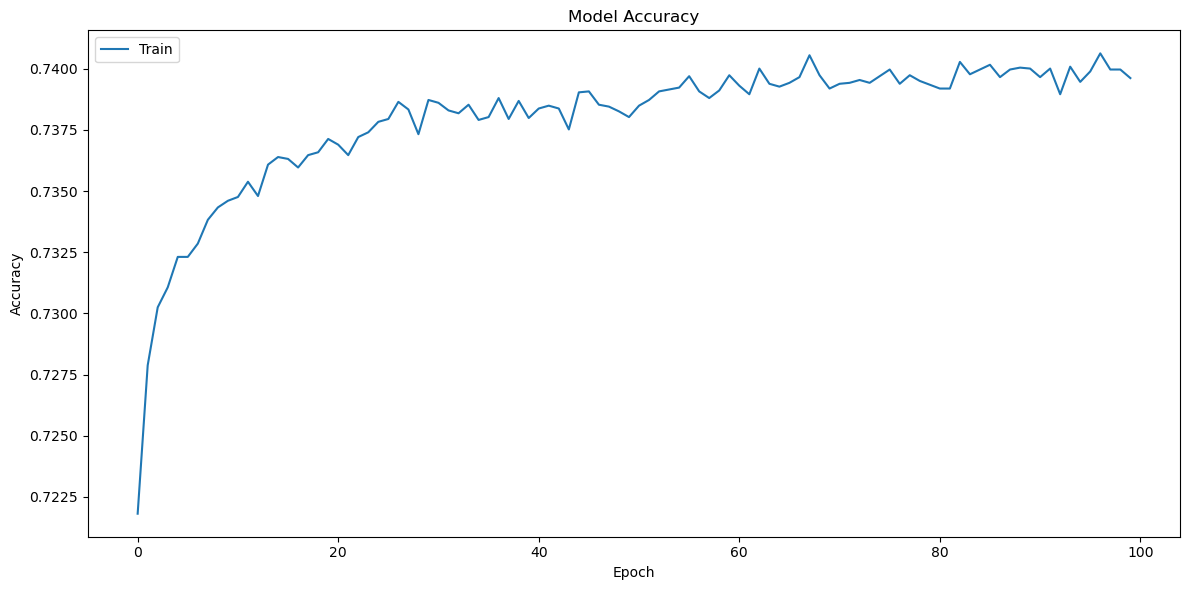

In [183]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.plot(try2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig(f'img/training_accuracy_2.png')
plt.show()

In [184]:
#Third ATTEMPT Changed number of the neuron units and also adding another layer 

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=90, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=70, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                │ (None, 90)             │         3,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 70)             │         6,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 80)             │         4,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,041 (70.47 KB)

 Trainable params: 18,041 (70.47 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
# Train the model
try3 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.7050 - loss: 0.5885
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.7280 - loss: 0.5560
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.7311 - loss: 0.5522
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.7325 - loss: 0.5503
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7343 - loss: 0.5487
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7342 - loss: 0.5476
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.7339 - loss: 0.5468
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.7344 - loss: 0.5458
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.7343 - loss: 0.5452
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7341 - loss: 0.5453
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.7356 - loss: 0.5443
Epoch 12/100
804/80

In [187]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 797us/step - accuracy: 0.7283 - loss: 0.5825
Loss: 0.5825293064117432, Accuracy: 0.7282798886299133


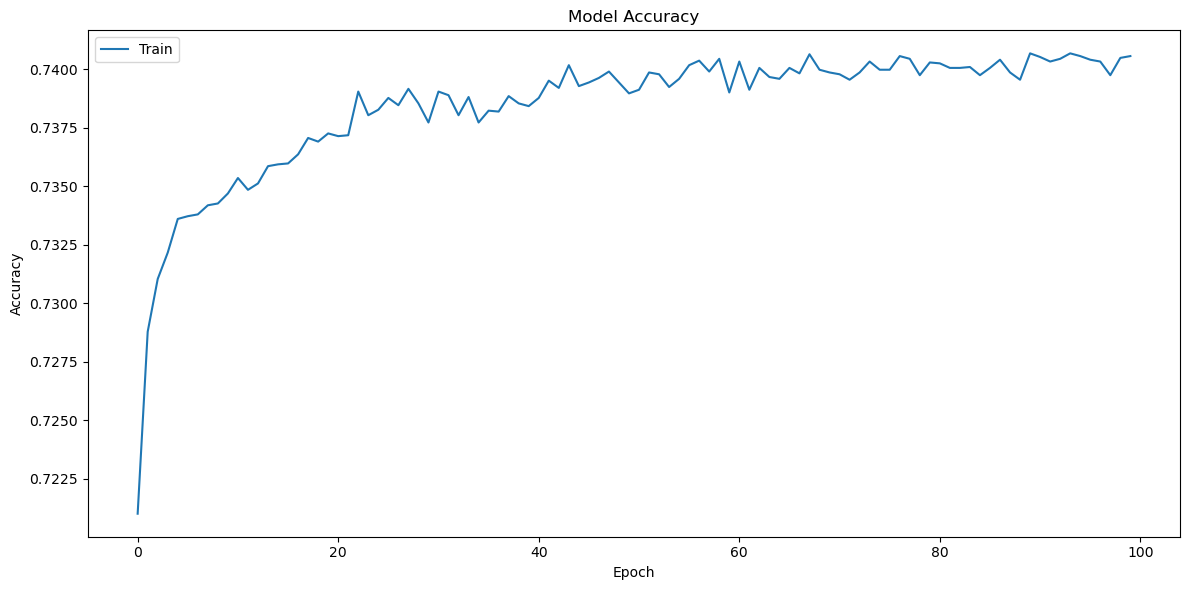

In [188]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.plot(try3.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig(f'img/training_accuracy_3.png')
plt.show()

In [189]:
#Fourth ATTEMPT Added Dropout layers to the model to prevent overfitting the model
from tensorflow.keras.layers import Dropout
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=90, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=70, activation='relu'))
nn.add(Dropout(0.1))
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn.add(Dropout(0.1))
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu'))
nn.add(Dropout(0.1))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                │ (None, 90)             │         3,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 70)             │         6,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 80)             │         4,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,041 (70.47 KB)

 Trainable params: 18,041 (70.47 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [191]:
# Train the model
try4 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 686us/step - accuracy: 0.7018 - loss: 0.5968
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.7297 - loss: 0.5615
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.7307 - loss: 0.5546
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.7314 - loss: 0.5533
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.7340 - loss: 0.5535
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.7308 - loss: 0.5509
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.7340 - loss: 0.5496
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.7334 - loss: 0.5506
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.7338 - loss: 0.5482
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.7323 - loss: 0.5490
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.7333 - loss: 0.5480
Epoch 12/100
804/80

In [192]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 754us/step - accuracy: 0.7290 - loss: 0.5665
Loss: 0.5664762258529663, Accuracy: 0.7289795875549316


In [193]:
# Export our model to HDF5 file
nn.save("Model/AlphabetSoupCharity_Optimization.h5")

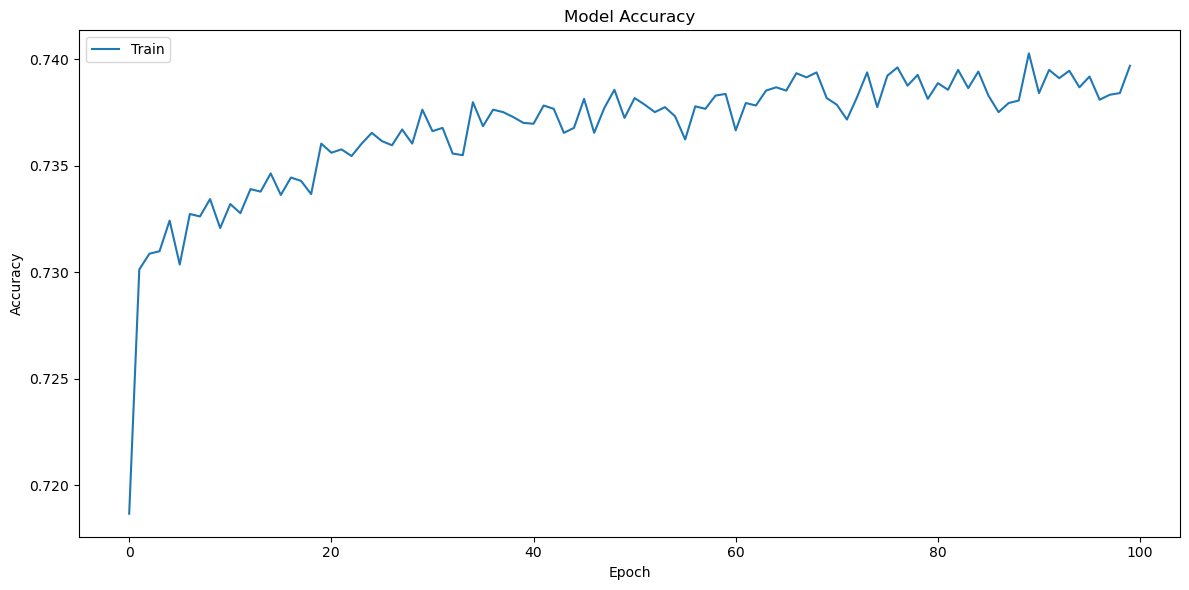

In [194]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.plot(try4.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig(f'img/training_accuracy_4.png')
plt.show()